<a href="https://colab.research.google.com/github/pschwartz222/MA-576/blob/main/Gauss_Newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
from numpy.linalg import eig
from numpy import linalg as LA
import matplotlib.pyplot as plt
import sympy
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sympy import diff, symbols
import pylab
import math
from sympy import cos, sin, exp, Matrix, hessian
import scipy as sp

In [21]:
x, y, z = sympy.symbols('x y z')

g_1 = 3*x- cos(y*z)-(3/2)
g_2 = 4*x**2 - 625*y**2 + 2*y - 1
g_3 = exp(-x*y) + 20*z + (10*np.pi - 3)/3

G = Matrix([[g_1], [g_2], [g_3]])

In [3]:
print(G)

Matrix([[3*x - cos(y*z) - 1.5], [4*x**2 - 625*y**2 + 2*y - 1], [20*z + 9.47197551196598 + exp(-x*y)]])


In [4]:
G.subs({x: .46, y: 1.9, z: -.9})

Matrix([
[0.0187545349523777],
[        -2252.6036],
[ -8.11074539783533]])

In [22]:
def Gauss_Newtown_Arm3(x_0, G, varis, tol, delta, s, beta, sigma):
  f = (.5*(G.T @ G))[0]
  gs = [G[i,:][0] for i in range(len(G))]

  num_f = sympy.lambdify(varis, f)
  num_G = sympy.lambdify(varis, G)

  grad_f = Matrix([[diff(f, v) for v in varis]]).T

  Jak = Matrix([[diff(g, v) for v in varis] for g in gs])

  num_grad_f = sympy.lambdify(varis, grad_f)

  num_Jak = sympy.lambdify(varis, Jak)

  err = math.inf

  x_it = x_0

  a, b, c = x_it[:, 0]

  D = (.5)*(LA.inv(num_Jak(a,b,c).T @ num_Jak(a,b,c))) #Gauss-Newton scalar matrix

  Gr = num_grad_f(a,b,c)

  d = - D @ Gr #Gauss-Newton descent direction

  it = 0


  while err > tol:
    alpha = s
    x_next = x_it + alpha*d
    while num_f(a, b, c) - num_f(x_next[0,0], x_next[1,0], x_next[2,0]) < - sigma*alpha*(d.T @ Gr)[0][0]:
      alpha = beta*alpha
      x_next = x_it + alpha*d

    if LA.norm(x_it - x_next) < delta :
      err = 0
      x_it = x_next
      it = it + 1

    else:

      #update iterates

      x_it = x_next
      a, b, c = x_it[:, 0]
      Gr = num_grad_f(a,b,c)
      D = (.5)*(LA.inv(num_Jak(a,b,c).T @ num_Jak(a,b,c)))
      d = - D @ Gr
      err = LA.norm(Gr)
      it = it + 1

  x_star_arm = x_it
  a, b, c = x_star_arm[:, 0]

  print('Number of iterations =', it)
  print('Approximate solution: x* =', x_star_arm.T)
  print('G(x*) =')
  print(num_G(a, b, c))
  print('||G(x*)||^2 =', 2*num_f(a,b,c))
  print()
  return(x_star_arm.T)

In [23]:
x_0 = np.array([[0,0,0]]).T
tol = 10**(-5)
delta = 10**(-4)
s = 2
beta = .5
sigma = .25

x_star = Gauss_Newtown_Arm3(x_0, G, [x, y, z], tol, delta, s, beta, sigma)

Number of iterations = 6
Approximate solution: x* = [[ 0.83319658  0.05494366 -0.52136143]]
G(x*) =
[[ 4.44755344e-13]
 [-2.08541784e-09]
 [ 1.08668630e-12]]
||G(x*)||^2 = 4.348968939558389e-18



Let's use Gauss-Newton to find a least-squares approximation for this data.

In [7]:
S = [.038, .194, .425, .626, 1.253, 2.5, 3.74] #subtrate concentrations
R = [.05, .127, .094, .2122, .2729, .2665, .3317] #reaction rates

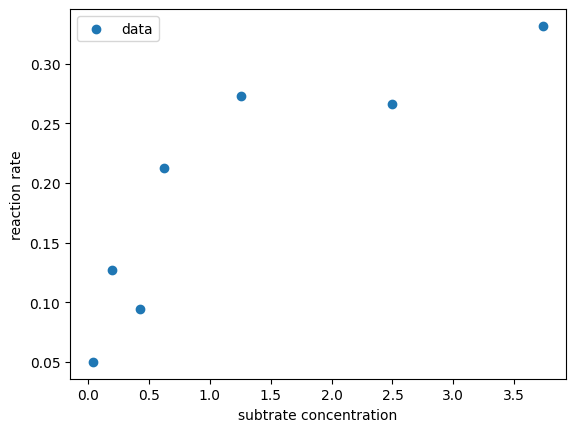

In [8]:
plt.figure()
plt.scatter(S, R, label = 'data')
plt.xlabel('subtrate concentration')
plt.ylabel('reaction rate')
plt.legend()
plt.show()

In [9]:
H = sympy.zeros(len(S), 1)

for i in range(len(S)):
  H[i,0] = (x*S[i])/(y + S[i]) - R[i]

num_H = sympy.lambdify([x, y], H)

In [14]:
def Gauss_Newtown_Arm2(x_0, G, varis, tol, delta, s, beta, sigma):
  f = (.5*(G.T @ G))[0]
  gs = [G[i,:][0] for i in range(len(G))]

  num_f = sympy.lambdify(varis, f)
  num_G = sympy.lambdify(varis, G)

  grad_f = Matrix([[diff(f, v) for v in varis]]).T

  Jak = Matrix([[diff(g, v) for v in varis] for g in gs])

  num_grad_f = sympy.lambdify(varis, grad_f)

  num_Jak = sympy.lambdify(varis, Jak)

  err = math.inf

  x_it = x_0

  a, b = x_it[:, 0]

  D = (.5)*(LA.inv(num_Jak(a,b).T @ num_Jak(a,b)))

  Gr = num_grad_f(a,b)

  d = - D @ Gr

  it = 0


  while err > tol:
    a = s
    x_next = x_it + a*d
    while num_f(a, b) - num_f(x_next[0,0], x_next[1,0]) < - sigma*a*(d.T @ Gr)[0][0]:
      a = beta*a
      x_next = x_it + a*d

    if LA.norm(x_it - x_next) < delta :
      err = 0
      x_it = x_next
      it = it + 1

    else:

      #update iterates

      x_it = x_next
      a, b = x_it[:, 0]
      Gr = num_grad_f(a,b)
      D = (.5)*(LA.inv(num_Jak(a,b).T @ num_Jak(a,b)))
      d = - D @ Gr
      err = LA.norm(Gr)
      it = it + 1

  x_star_arm = x_it
  a, b = x_star_arm[:, 0]

  print('Number of iterations =', it)
  print('Approximate solution: x* =', x_star_arm.T)
  print('G(x*) =')
  print(num_G(a, b))
  print('||G(x*)||^2 =', (2*num_f(a,b)))
  return(x_star_arm)

In [15]:
x_1 = np.array([[1, 0]]).T

beta_hat = Gauss_Newtown_Arm2(x_1, H, [x, y], tol, delta, s, beta, sigma)

Number of iterations = 8
Approximate solution: x* = [[0.36182618 0.55620536]]
G(x*) =
[[-0.02686087]
 [-0.03343325]
 [ 0.06272165]
 [-0.02060622]
 [-0.02231031]
 [ 0.02947666]
 [-0.0167174 ]]
||G(x*)||^2 = 0.007844005847474413


In [16]:
print(beta_hat)

[[0.36182618]
 [0.55620536]]


In [17]:
beta_1 = beta_hat[0,0]
beta_2 = beta_hat[1,0]

L = [num_H(beta_1, beta_2)[i][0]+R[i] for i in range(len(H))]

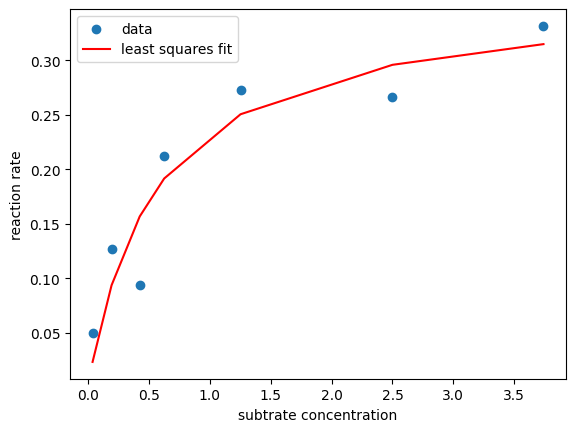

In [19]:
plt.figure()
plt.scatter(S, R, label = 'data')
plt.plot(S, L, label = 'least squares fit', color = 'red')
plt.xlabel('subtrate concentration')
plt.ylabel('reaction rate')
plt.legend()
plt.show()

Now let's use the Pure Newton method.

In [26]:
def pure_newton2(x_0, f, varis, tol):
  num_f = sympy.lambdify(varis, f)

  grad_f = Matrix([[diff(f, v) for v in varis]]).T

  hess_f = hessian(f, varis) #needs to be positive definite

  num_grad_f = sympy.lambdify(varis, grad_f)

  num_hess_f = sympy.lambdify(varis, hess_f)

  a, b = x_0[:,0]

  err = math.inf

  it = 0

  x_it = x_0

  while err > tol:
    x_next = x_it - LA.inv(num_hess_f(a,b)) @ num_grad_f(a,b) #pure Newton descent direction
    x_it = x_next
    a, b = x_it[:, 0]
    err = LA.norm(num_grad_f(a,b))
    it = it + 1

  print('Number of iterations =', it)
  print('Approximate solution: x* =', x_it.T)
  print('f(x*) =', num_f(a,b))

In [22]:
f_1 = x**2 + (1/100)*y**2 #condition number of f we saw is 100

x_0 = np.array([[1/100, 1]]).T
pure_newton2(x_0, f_1, [x, y], tol)

Number of iterations = 1
Approximate solution: x* = [[0. 0.]]
f(x*) = 0.0


In [24]:
def pure_newton3(x_0, f, varis, tol):
  num_f = sympy.lambdify(varis, f)

  grad_f = Matrix([[diff(f, v) for v in varis]]).T

  hess_f = hessian(f, varis)

  num_grad_f = sympy.lambdify(varis, grad_f)

  num_hess_f = sympy.lambdify(varis, hess_f)

  a, b, c = x_0[:,0]

  err = math.inf

  it = 0

  x_it = x_0

  while err > tol:
    x_next = x_it - LA.inv(num_hess_f(a,b,c)) @ num_grad_f(a,b,c)
    x_it = x_next
    a, b, c = x_it[:, 0]
    err = LA.norm(num_grad_f(a,b,c))
    it = it + 1

  print('Number of iterations =', it)
  print('Approximate solution: x* =', x_it.T)
  print('f(x*) =', num_f(a,b,c))
  return(x_it.T)

In [29]:
x_0 = np.array([[1,1]]).T

f = 100*x**4 +(.01)* y**4

x_star = pure_newton2(x_0, f, [x, y], 10**(-8))

Number of iterations = 21
Approximate solution: x* = [[0.00020049 0.00020049]]
f(x*) = 1.6157630289181907e-13


Pure Newton will converge if we give it this sum of radicals and a starting point outside the unit circle.

In [30]:
f = sympy.sqrt(1 + x**2) + sympy.sqrt(1 + y**2)

print(f)

sqrt(x**2 + 1) + sqrt(y**2 + 1)


In [32]:
x_0 = np.array([[.5, .5]]).T #we need a < 1 and b < 1

x_star = pure_newton2(x_0, f, [x, y], 10**(-5))

Number of iterations = 3
Approximate solution: x* = [[-7.4505806e-09 -7.4505806e-09]]
f(x*) = 2.0


Let's experiment with Cholesky factorization.

In [ ]:
A = np.array([[2, -1], [-1, 3]])

L = LA.cholesky(A)

print(L)

print(L @ L.T)

[[ 1.41421356  0.        ]
 [-0.70710678  1.58113883]]
[[ 2. -1.]
 [-1.  3.]]


In [ ]:
(U, p) = sp.linalg.lapack.dpotrf(A) #p=0 means A is p.d.

print(U)
print(p)

print(U.T @ U) #LL^T = U^T U since U = L^T

[[ 1.41421356 -0.70710678]
 [ 0.          1.58113883]]
0
[[ 2. -1.]
 [-1.  3.]]


Now let's create a hybrid gradient-Newton method.

In [36]:
def HGN(x_0, f, varis, tol, s, beta, sigma):
  num_f = sympy.lambdify(varis, f)

  grad_f = Matrix([[diff(f, v) for v in varis]]).T

  hess_f = hessian(f, varis)

  num_grad_f = sympy.lambdify(varis, grad_f)

  num_hess = sympy.lambdify(varis, hess_f)

  err = math.inf

  x_it = x_0

  a,b = x_it[:, 0]

  it = 0

  while err > tol:
    Gr = num_grad_f(a,b)

    (U, p) = sp.linalg.lapack.dpotrf(num_hess(a,b))

    #choose descent direction

    if p == 0: # Hessian is positive definite
      A = LA.inv(U)
      d = - A @ A.T @ num_grad_f(a,b)

    else: #Hessian is not p.d.
      d = - Gr

    alpha = s
    x_next = x_it + alpha*d

    while num_f(a, b) - num_f(x_next[0,0], x_next[1,0]) < - sigma*alpha*(d.T @ Gr)[0][0]:
      alpha = beta*alpha
      x_next = x_it + alpha*d

      #update iterates

    x_it = x_next
    a, b = x_it[:, 0]
    Gr = num_grad_f(a,b)
    err = LA.norm(Gr)
    it = it + 1

  x_star_arm = x_it
  a, b = x_star_arm[:, 0]

  print('Number of iterations =', it)
  print('Approximate solution: x* =', x_star_arm.T)
  print('f(x*) =', num_f(a,b))
  return(x_star_arm)


Let's try Hybrid gradient-Newton on the Rosenbrock function

In [34]:
f = 100*(y-x**2)**2 + (1-x)**2

print(f)

(1 - x)**2 + 100*(-x**2 + y)**2


In [39]:
x_0 = np.array([[2, 4]]).T

x_star = HGN(x_0, f, [x, y], 10**(-5), 1, .25, .5)

Number of iterations = 22
Approximate solution: x* = [[1. 1.]]
f(x*) = 2.9920407392854374e-21


In [40]:
x_star = pure_newton2(x_0, f, [x, y], 10**(-5))

Number of iterations = 2
Approximate solution: x* = [[1. 1.]]
f(x*) = 8.475829714485653e-27


Now let's try hybrid gradient-Newton of this sum of radicals.

In [41]:
f = sympy.sqrt(1 + x**2) + sympy.sqrt(1 + y**2)

print(f)

sqrt(x**2 + 1) + sqrt(y**2 + 1)


In [43]:
x_0 = np.array([[1, 1]]).T

x_star = HGN(x_0, f, [x, y], 10**(-5), 1, .25, .25)

Number of iterations = 4
Approximate solution: x* = [[-7.4505806e-09 -7.4505806e-09]]
f(x*) = 2.0


In [44]:
x_0 = np.array([[1,1]]).T

f = 100*x**4 +(.01)* y**4

x_star = HGN(x_0, f, [x, y], 10**(-5), 1, .25, .5)

Number of iterations = 15
Approximate solution: x* = [[0.00228366 0.00228366]]
f(x*) = 2.7199936111003318e-09


Now let's implement a modified hessian method.

In [45]:
def mod_hess2(x_0, f, varis, tol, delta, s, beta, sigma):
  n = len(varis)

  num_f = sympy.lambdify(varis, f)

  grad_f = Matrix([[diff(f, v) for v in varis]]).T

  hess_f = hessian(f, varis)

  num_grad_f = sympy.lambdify(varis, grad_f)

  num_hess = sympy.lambdify(varis, hess_f)

  err = math.inf

  x_it = x_0

  a,b = x_it[:, 0]

  Gr = num_grad_f(a,b)

  it = 0

  while err > tol:

    H = num_hess(a,b)

    #choose descent direction

    V, P = LA.eig(H) #V is an array with the eigenvalues of the Hessian

    if any(v < 0 for v in V):
      tau = min(0, delta - min(V))
      H = H + tau*np.identity(n)

    d = - LA.inv(H) @ Gr

    alpha = s
    x_next = x_it + alpha*d

    #perform Armijo backtracking

    while num_f(a, b) - num_f(x_next[0,0], x_next[1,0]) < - sigma*alpha*(d.T @ Gr)[0][0]:
      alpha = beta*alpha
      x_next = x_it + alpha*d

      #update iterates

    x_it = x_next
    a, b = x_it[:, 0]
    Gr = num_grad_f(a,b)
    err = LA.norm(Gr)
    it = it + 1

  x_star_arm = x_it
  a, b = x_star_arm[:, 0]

  print('Number of iterations =', it)
  print('Approximate solution: x* =', x_star_arm.T)
  print('f(x*) =', num_f(a,b))
  return(x_star_arm)

In [46]:
f = 100*(y-x**2)**2 + (1-x)**2

print(f)

(1 - x)**2 + 100*(-x**2 + y)**2


In [54]:
x_0 = np.array([[2, 4]]).T

x_star = mod_hess2(x_0, f, [x, y], 10**(-5), 10**(-5), 1, .25, .5)

Number of iterations = 22
Approximate solution: x* = [[1. 1.]]
f(x*) = 2.9920407392854374e-21


In [ ]:
x_star = mod_hess2(x_0, f, [x, y], 10**(-5), 10**(-5), 1, .5, .25)

Number of iterations = 2
Approximate solution: x* = [[1. 1.]]
f(x*) = 8.475829714485653e-27


In [55]:
f = sympy.sqrt(1 + x**2) + sympy.sqrt(1 + y**2)

print(f)

sqrt(x**2 + 1) + sqrt(y**2 + 1)


In [57]:
x_0 = np.array([[1, 1]]).T

x_star = mod_hess2(x_0, f, [x, y], 10**(-5), 10**(-5), 1, .5, .25)

Number of iterations = 1
Approximate solution: x* = [[0. 0.]]
f(x*) = 2.0


In [58]:
Q = np.array([[6, 0, 4], [0, 2, 0], [4, 0, 8]])

In [59]:
def gram_schmidt(Q): #applies gram-schmidt using the standard basis for R^n
  n = len(Q)
  V = []
  U = []
  I = np.identity(n)
  for i in range(n):
    V.append(I[:, i])

  U.append(V[0])

  for i in range(1, n):
    sum = np.zeros((n,1))
    for k in range(i):
      sum = sum + ((V[i].T @ Q @ U[k])/(U[k].T @ Q @ U[k]))*U[k]
    U.append(V[i] - sum)

  return(U)

In [60]:
def proj(Q, u, v): #projection of v onto u.
  return(((v.T @ Q @ u)/(u.T @ Q @ u))*u)

In [61]:
V = np.identity(3)
U = np.zeros((3,3))

U[:, 0] = V[:, 0]

U[:, 1] = V[:, 1] - proj(Q, U[:, 0], V[:, 1])

U[:, 2] = V[:, 2] - proj(Q, U[:, 0], V[:, 2]) - proj(Q, U[:, 1], V[:, 2])

print(U)


[[ 1.          0.         -0.66666667]
 [ 0.          1.          0.        ]
 [ 0.          0.          1.        ]]


In [ ]:
print(proj(Q, U[:, 0], U[:, 2]))

In [ ]:
def gram_schmidt(Q, V): #creates Q-conjugate vectors from the columns of V.
  n = len(Q)
  U = V

  for i in range(1, n):
    for k in range(i):
      U[:, i] = U[:, i] - proj(Q, U[:, k], V[:, i])

  return(U)

In [ ]:
U_test = gram_schmidt(Q, np.identity(3))

print(U_test)

In [ ]:
A = np.array([[2, 0], [0, 16]])

U_A = gram_schmidt(A, np.identity(2))

print(U_A)

[[1. 0.]
 [0. 1.]]


In [63]:
def conjugate_gradient(x_0, Q, b):
  n = len(Q)
  x = x_0

  for i in range(n):
    if i == 0:
      g = Q @ x - b
      d = -g
    else:
      x = x_next
      g = g_next
      d = d_next
    alpha = -(g.T @ d)/(d.T @ Q @ d)
    x_next = x + alpha * d
    g_next = Q @ x_next - b
    beta = (g_next.T @ Q @ d)/(d.T @ Q @ d)
    d_next = -g_next + beta*d #this gives us Q-conjugate descent directions

  x = x_next
  print('x* =', x.T)
  print('f(x*) =', (.5*(x.T @ Q @ x) - b.T @ x)[0,0])

  return(x)


In [64]:
x_0 = np.array([[2, 1]]).T

A = np.array([[2, 0], [0, 16]])

b = np.array([[0, 0]]).T

c = 0

x_star = conjugate_gradient(x_0, A, b)

x* = [[-2.22044605e-16 -1.11022302e-16]]
f(x*) = 1.4791141972893971e-31


In [65]:
Q = np.array([[8, 0, -4], [0, 2, 2], [-4, 2, 6]])

b = np.array([[4, -2, 0]]).T

x_0 = np.array([[-2, 0, -2]]).T

x_star = conjugate_gradient(x_0, Q, b)

x* = [[ 1.5 -3.   2. ]]
f(x*) = -6.000000000000001
